## Principal Component Analysis
"Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional datasets into a dataset with fewer variables, where the set of resulting variables explains the maximum variance within the dataset." (https://districtdatalabs.silvrback.com/principal-component-analysis-with-python)
The overall goal of PCA is to reduce the number of d dimensions (features) in a dataset by projecting it onto a k dimensional subspace where k < d. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline
# forward/backward feature selection based on p-value
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("caravan-insurance-challenge.csv") 
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [3]:
all_vars = df.drop(['ORIGIN'], axis=1)
x_vars = all_vars.drop(['CARAVAN'], axis=1)
y = df['CARAVAN']

print(y[0:5])
all_vars.head()

0    0
1    0
2    0
3    0
4    0
Name: CARAVAN, dtype: int64


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# principal component analysis 

# standardize the data 
X_std = StandardScaler().fit_transform(x_vars)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00010182 -0.04033167 -0.0065945  ... -0.0255354  -0.01633792
  -0.04375385]
 [-0.04033167  1.00010182 -0.00431565 ... -0.01252764  0.0319394
  -0.005852  ]
 [-0.0065945  -0.00431565  1.00010182 ...  0.01848839  0.01092878
   0.03085877]
 ...
 [-0.0255354  -0.01252764  0.01848839 ...  1.00010182  0.00204416
   0.00712214]
 [-0.01633792  0.0319394   0.01092878 ...  0.00204416  1.00010182
   0.01727922]
 [-0.04375385 -0.005852    0.03085877 ...  0.00712214  0.01727922
   1.00010182]]


In [5]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.80741073e-01  1.90012238e-01 -1.08200120e-02 ... -1.19823729e-02
  -1.86481597e-03 -3.99575753e-04]
 [ 6.86446049e-05 -9.97766755e-03  1.42353206e-02 ... -5.62264287e-03
  -1.64017734e-03 -1.88420999e-03]
 [ 1.21471618e-01  2.78081107e-01  9.89312897e-02 ...  1.32823262e-03
   4.33591381e-03 -1.66503718e-03]
 ...
 [ 1.26127757e-02 -1.12937278e-02  2.14048183e-02 ...  9.27489842e-03
   2.15410748e-02 -4.32546502e-03]
 [ 1.32624344e-02 -5.62562226e-03 -1.97657957e-02 ...  1.93069813e-03
   1.94621753e-03 -5.83645630e-03]
 [ 2.36962778e-02  1.36883444e-02 -4.79283762e-02 ...  4.76677274e-02
  -1.50691498e-02 -3.00046503e-02]]

Eigenvalues 
[9.38114298e+00 4.90789884e+00 3.98336652e+00 3.34322942e+00
 2.92824840e+00 2.64384083e+00 2.26219960e+00 2.23659410e+00
 2.14010672e+00 2.10857567e+00 2.00996208e+00 1.95746407e+00
 1.91389055e+00 1.90310544e+00 1.86888982e+00 1.84630241e+00
 1.79586996e+00 1.81596659e+00 1.72663381e+00 1.68813177e+00
 1.55440514e+00 1.62031830e+00 

In [6]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


Now that we've run our model and transformed the dataset, let's see how many variables we need to optimize the prediction.

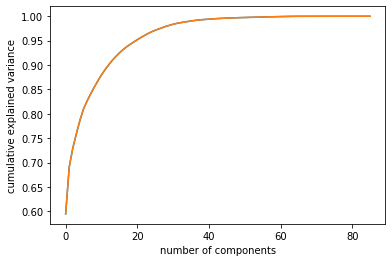

In [7]:
pca = PCA().fit(all_vars)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
pca = PCA(0.75).fit(all_vars)
pca.n_components_

4